# Linear Regression -Boston Housing Data Set

In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
#Importing the data

data=pd.read_csv("hou_all.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Data preprocessing-treating missing values and outliers if found
data.isnull().sum()/data.count()

CRIM       0.0
ZN         0.0
INDUS      0.0
CHAS       0.0
NOX        0.0
RM         0.0
AGE        0.0
DIS        0.0
RAD        0.0
TAX        0.0
PTRATIO    0.0
B          0.0
LSTAT      0.0
Medv       0.0
dtype: float64

In [ ]:
#There are no missing values

In [4]:
#To treat outliers:

data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
#calculation 99th percentile
floor=data.quantile(0.99)
floor


CRIM        41.37033
ZN          90.00000
INDUS       25.65000
CHAS         1.00000
NOX          0.87100
RM           8.33500
AGE        100.00000
DIS          9.22277
RAD         24.00000
TAX        666.00000
PTRATIO     21.20000
B          396.90000
LSTAT       33.91850
Medv        50.00000
Name: 0.99, dtype: float64

In [11]:
# calculating 1st percentile
ceil=data.quantile(0.01)
ceil

CRIM         0.01361
ZN           0.00000
INDUS        1.25350
CHAS         0.00000
NOX          0.39800
RM           4.52445
AGE          6.61000
DIS          1.20654
RAD          1.00000
TAX        188.00000
PTRATIO     13.00000
B            6.73000
LSTAT        2.88300
Medv         7.01000
Name: 0.01, dtype: float64

In [ ]:
#Parameters to treat based on 99th percentile
#[CRIM,TAX,LSTAT]
#parameters to treat based on 1st percentile
#[CRIM,INDUS,AGE,B,LSTAT]

In [12]:
#treatin g outliers at maximum end
data['CRIM']=np.where(data['CRIM']>41.37,data['CRIM'].quantile(0.99),data['CRIM'])
data['TAX']=np.where(data['TAX']>666,data['TAX'].quantile(0.99),data['TAX'])
data['LSTAT']=np.where(data['LSTAT']>33.91,data['TAX'].quantile(0.99),data['TAX'])

#treating outliers at minimum end
data['CRIM']=np.where(data['CRIM']<0.01361,data['CRIM'].quantile(0.01),data['CRIM'])
data['INDUS']=np.where(data['INDUS']<1.2535,data['INDUS'].quantile(0.01),data['INDUS'])
data['AGE']=np.where(data['AGE']<6.16,data['AGE'].quantile(0.01),data['AGE'])
data['B']=np.where(data['B']<6.73,data['B'].quantile(0.01),data['B'])
data['LSTAT']=np.where(data['LSTAT']<2.88,data['LSTAT'].quantile(0.01),data['LSTAT'])


In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.373385,11.363636,11.139528,0.069170,0.554695,6.284634,68.583439,3.795043,9.549407,407.792490,18.455534,356.715751,408.245059,22.532806
std,6.899121,23.322453,6.856254,0.253994,0.115878,0.702617,28.129525,2.105710,8.707259,167.793987,2.164946,91.133441,168.181300,9.197104
min,0.013610,0.000000,1.253500,0.000000,0.385000,3.561000,6.200000,1.129600,1.000000,187.000000,12.600000,6.730000,187.000000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,279.000000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,330.000000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,666.000000,25.000000
max,41.219403,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,666.000000,22.000000,396.900000,666.000000,50.000000


In [15]:
data['target']=data['Medv']
data_new=data.drop(['Medv'],axis=1)
data=data_new

Text(0, 0.5, 'Number of houses')

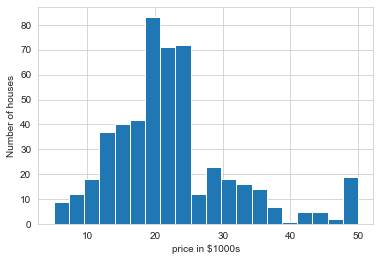

In [17]:
#Plotting histogram:
plt.hist(data.target,bins=20)
plt.xlabel('price in $1000s')
plt.ylabel('Number of houses')

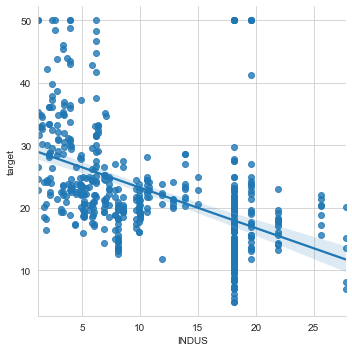

In [18]:
#To see correlation:
sns.lmplot(x='INDUS',y='target',data=data)

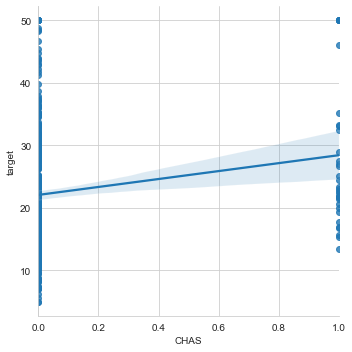

In [19]:
sns.lmplot(x='CHAS',y='target',data=data)

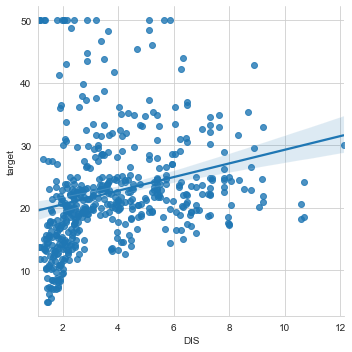

In [20]:
sns.lmplot(x='DIS',y='target',data=data)

In [21]:
x=data.drop('target',1)
y=data.target

In [22]:
import statsmodels.api as sm
mod=sm.OLS(y,x)
res=mod.fit()

In [23]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              779.0
Date:                Fri, 09 Oct 2020   Prob (F-statistic):                   9.08e-319
Time:                        01:34:31   Log-Likelihood:                         -1556.4
No. Observations:                 506   AIC:                                      3139.
Df Residuals:                     493   BIC:                                      3194.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.1979      0.052     -3.835      0.000      -0.299      -0.097
ZN             0.0423      0.015      2.746      0.006       0.012       0.073
INDUS         -0.0414      0.068     -0.605      0.545      -0.176       0.093
CHAS           3.2198      0.963      3.342      0.001       1.327       5.113
NOX          -10.3575      3.442     -3.009      0.003     -17.121      -3.594
RM             7.1081      0.291     24.405      0.000       6.536       7.680
AGE           -0.0446      0.014     -3.203      0.001      -0.072      -0.017
DIS           -1.2273      0.206     -5.946      0.000      -1.633      -0.822
RAD            0.2310      0.075      3.083      0.002       0.084       0.378
TAX           -0.0265      0.024     -1.105      0.269      -0.074       0.021
PTRATIO       -0.6531      0.113     -5.800      0.000      -0.874      -0.432
B              0.0163      0.003      5.657      0.000       0.011       0.022
LSTAT          0.0160      0.023      0.682      0.496      -0.030       0.062
==============================================================================
Omnibus:                      275.939   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3010.316
Skew:                           2.144   Prob(JB):                         0.00
Kurtosis:                      14.153   Cond. No.                     1.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
sig_vars=['CRIM','ZN','CHAS','RM','AGE','RAD','PTRATIO','B','TAX']
x_vars=data[sig_vars]
x_vars.shape

(506, 9)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x_vars,y,test_size=0.3,random_state=42)

In [28]:
linreg=LinearRegression()
model=linreg.fit(X_train,Y_train)

In [29]:
model.score(X_train,Y_train)

0.6429632583565192

In [30]:
model.score(X_test,Y_test)

0.6309939081396487

In [31]:
print("the estimated intercept of the model %.2f"%linreg.intercept_)

the estimated intercept of the model -4.34
